# DSAI 2201 Winter 2024 Assignment

In [39]:
NAME = "Write your name her"

COLLABORATORS = ""

## Assignment 1 - Data Analysis
**(20 points in total)**

In Assignments part 1 & part 2 we will go through the entire journey of a small data science project.

More details about the dataset can be found in the Kaggle website in the following links: https://www.kaggle.com/datasets/reihanenamdari/breast-cancer

But a modified version of the dataset was attached in the dropbox, please use it to answer this assignment
     



**Question 1.**  _(2 points)_
* A) Analyze the distribution of death events cases among the patients and the race. calculate their respective numbers and percentages.  _(0.5 points)_
* B) Compute descriptive statistics of the data. Comment on the results.  _(0.75 points)_
* C) Analyze the skew and the kurtosis of medical variables distributions(Numbers & Graphs). Comment on the results.  _(0.75  points)_

**Question 2.**  _(2 points)_
* Use univariate plots  to analyze patterns in each of the medical variables with respect to the outcome (death status). What categories of patients( race and marital status) were most likely to die from breast cancer? . (2 points)


**Question 3.**  _(2 points)_
* Use multivariate plots to:
   * A) Analyze the relationship between medical variables. Comment on the results  _(1 points)_
   * B) Identify potential factors that can predict Death event in married patients. Comment on the results.  _(1 points)_

**Question 4.**  _(3 points)_
* Identify and remove any outliers in the medical variables. Explain the rationale for identifying and removing outliers.  _(3 points)_

**Question 5.**  _(3 points)_
* How did you treat missing values for the attributes that you included in the analysis ? Provide a detailed explanation in the comments._(3 points)_

**Question 6.**  _(3 points)_
* The dataset contains  contains alot of zeros, identify which attributes cannot be 0 medically speaking, and impute them, while explaining the rational behind it._(3 points)_


**Question 7.**  _(2 points)_
* Identify the attibutes that will need rescalling ( with explanation ), apply one of the rescalling techniques we have seen in our course and explain your rational. _(2 points)_

**Question 8.**  _(3 points)_
* Through an extensive research, provide additional attributes that you can create that will enhance your dataset, explain the logic behind it, and add them to your data, _(1.5 points)_
* identify the most irrelevant attribute(s), and exclude them from your project for the next steps  _(1.5 points)_

In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import warnings

# Suppress warnings
warnings.filterwarnings("ignore")
df = pd.read_csv('Breast_Cancer-Winter2024.csv')
df.head(2)

,Age,Race,Marital Status,T Stage,N Stage,6th Stage,differentiate,Grade,A Stage,Tumor Size,Estrogen Status,Progesterone Status,Regional Node Examined,Reginol Node Positive,Survival Months,Status
0,68,White,Married,T1,N1,IIA,Poorly differentiated,3,Regional,4.0,Positive,Positive,24,1,60.0,Alive
1,50,White,Married,T2,N2,IIIA,Moderately differentiated,2,Regional,35.0,Positive,Positive,14,5,62.0,Alive


## Q1:

Solution:



#### Q1-A)

In [41]:
# alive, dead = (df.Status.value_counts() / df.shape[0]) * 100
# print(f'The percentage of Alive: {alive:.4}%\nand percentage of dead: {dead:.4}%')

In [42]:
print('Distribution of Race in numbers:')
print(df.Race.value_counts())

print('='*30)

print('Distribution of Status in numbers:')
print(df.Status.value_counts())

Distribution of Race in numbers:
White    3413
Other     320
Black     291
Name: Race, dtype: int64
Distribution of Status in numbers:
Alive    3408
Dead      616
Name: Status, dtype: int64


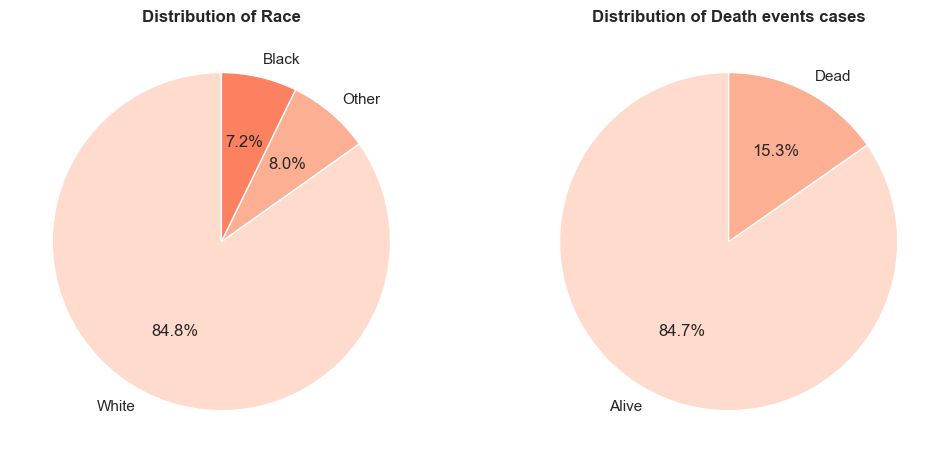

In [43]:
sns.set_palette('Reds')

race_values = df.Race.value_counts()
status_values = df.Status.value_counts()

fig, ax = plt.subplots(1, 2, figsize=(12, 6));
ax[0].pie(race_values, labels=race_values.index,  autopct='%1.1f%%', startangle=90);
ax[0].set_title('Distribution of Race', fontweight='bold');

ax[1].pie(status_values, labels=status_values.index,  autopct='%1.1f%%', startangle=90);
ax[1].set_title('Distribution of Death events cases', fontweight='bold');

#### Q1-B)

In [44]:
numeric_data_status = df.describe()
object_data_status  = df.describe(include=['object'])

##### Numeric data

In [ ]:
numeric_data_status

,Age,Tumor Size,Regional Node Examined,Reginol Node Positive,Survival Months
count,4024.000000,4018.000000,4024.000000,4024.000000,4017.000000
mean,53.972167,30.422101,14.357107,4.158052,71.173762
std,8.963134,21.154352,8.099675,5.109331,23.089655
min,30.000000,0.000000,1.000000,1.000000,0.000000
25%,47.000000,16.000000,9.000000,1.000000,56.000000
50%,54.000000,25.000000,14.000000,2.000000,73.000000
75%,61.000000,38.000000,19.000000,5.000000,90.000000
max,69.000000,140.000000,61.000000,46.000000,107.000000


**Comment on the descriptive statistics of `Numeric data`**
* There are missing values in `Tumor Size` & `Survival Months`.

* **Age:**
    * The average age is around 54 years, with a moderate variability of approximately 9 years.
    * Patients' ages range from 30 to 69 years.
---
* **Tumor Size:**

    * The average tumor size is approximately 30.4 units, with considerable variability (standard deviation ~21.2).
    * Tumor sizes range from 0 to 140 units.
---
* **Regional Node Examined:**

    * On average, approximately 14.4 regional nodes are examined, with a moderate spread (standard deviation ~8.1).
    * The range extends from 1 to 61 nodes.
---

* **Regional Node Positive:**

    * The average number of positive nodes is around 4.2, with a notable variability (standard deviation ~5.1).
    * Positive nodes range from 1 to 46.

---
* **Survival Months:**

    * The average survival period is approximately 71.2 months, with a substantial spread (standard deviation ~23.1).
    * Patients' survival periods range from 0 to 107 months.

##### Object data

In [46]:
object_data_status

,Race,Marital Status,T Stage,N Stage,6th Stage,differentiate,Grade,A Stage,Estrogen Status,Progesterone Status,Status
count,4024,4024,4019,4024,4024,4018,4024,4024,4024,4024,4024
unique,3,5,4,3,5,4,4,2,2,3,2
top,White,Married,T2,N1,IIA,Moderately differentiated,2,Regional,Positive,Positive,Alive
freq,3413,2643,1785,2732,1305,2349,2351,3932,3755,3322,3408


**Comment on the descriptive statistics of `Object data`**
* There are missing values in `T Stage` & `differentiate`.

* **Race:**
    * The dataset includes information for three racial categories.
    * The majority of patients (3413) belong to the White racial category.
---
* **Marital Status:**

    * There are five unique marital status categories.
    * The most common marital status among patients is "Married," with 2643 occurrences.
---
* **N Stage :**

    * Three unique regional lymph node stages (N0 to N2) are represented.
    * The most common N stage is "N1," observed in 2732 cases.
---

* **6th Stage:**
    * The dataset includes five stages (I to V) with the most common being "IIA" (1305 occurrences).

---
* **Differentiate:**

    * Four categories describe the level of differentiation, with "Moderately differentiated" being the most common (2349 occurrences).
---
* **Grade:**
    * Tumor grade is categorized into four levels (1 to 4) with "2" being the most frequent grade (2351 occurrences).
---

* **A Stage:**
    * Two categories describe the A stage, and "Regional" is the predominant stage (3932 occurrences).

---
* **Estrogen Status:**

    * Two unique categories represent estrogen status.
    * "Positive" is the dominant estrogen status, occurring in 3755 cases.
---
* **Progesterone Status:**

    * Two categories represent progesterone status.
    * "Positive" is the more common status, occurring in 3322 cases.
---
* **Status:**

    * Two unique values represent the survival status.
    * The majority of patients (3408) are labeled as "Alive."

#### Q1-C)

In [51]:
skewness

Age                      -0.220373
Tumor Size                1.736065
Regional Node Examined    0.829274
Reginol Node Positive     2.702536
Survival Months          -0.611098
dtype: float64

In [47]:
skewness = df.skew(numeric_only=True)
kurtosis = df.kurtosis(numeric_only=True)

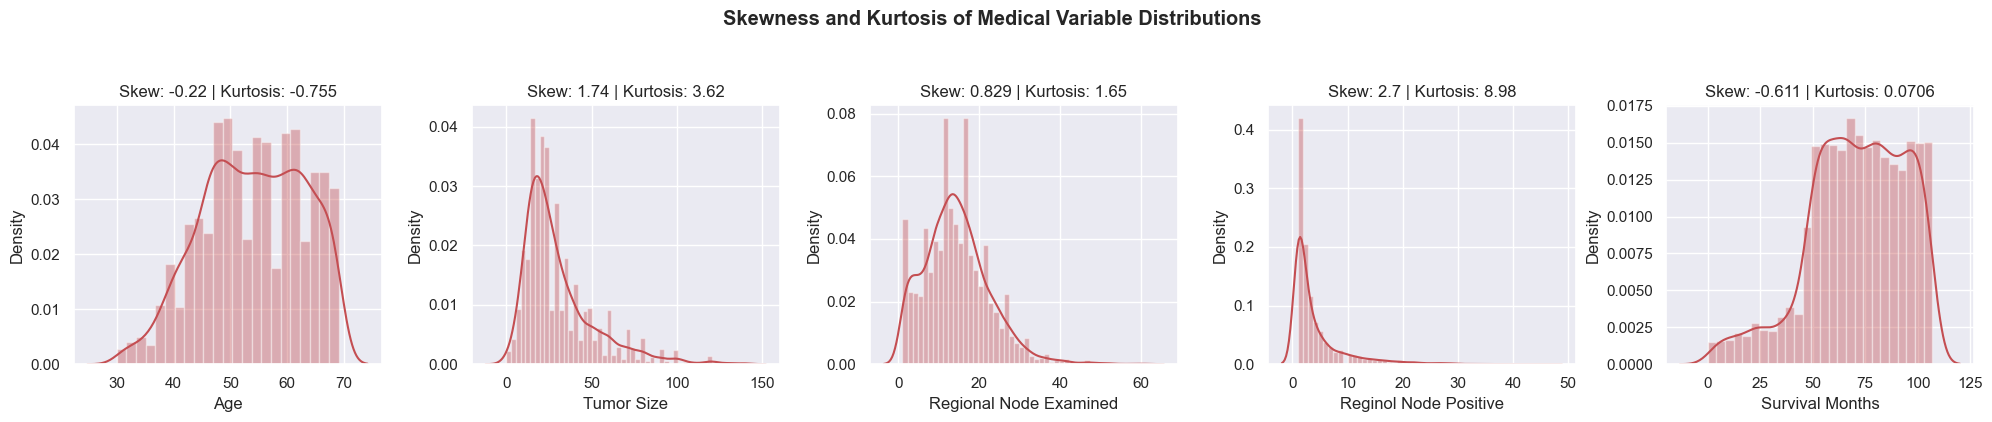

In [53]:
fig, ax = plt.subplots(1, 5, figsize=(20, 4))
fig.suptitle('Skewness and Kurtosis of Medical Variable Distributions', fontweight='bold', y=1.05)

for i in range(len(skewness)):
    column_name = skewness.index[i]
    skew_value = skewness.values[i]
    kurtosis_value = kurtosis.values[i]
    
    sns.distplot(df[column_name], color='r', ax=ax[i]);
    ax[i].set_title(f'Skew: {skew_value:.3} | Kurtosis: {kurtosis_value:.3}')

plt.tight_layout()

> **Note That:** In the pandas library, the kurtosis function calculates the kurtosis of a distribution.\
However, it uses the "excess kurtosis" by default, which means it subtracts 3 from the standard kurtosis.\
For a normal distribution, this will result in a kurtosis value of 0

**Skewness:**

* **Age (Skewness: -0.220373):**

    * The negative skewness indicates a slightly left-skewed distribution.
    * The distribution has a tail on the left side, suggesting a few patients with ages slightly lower than the average.

---

* **Tumor Size (Skewness: 1.736065):**

    * The sizes of tumors lean more towards the larger side.
    * Many patients have bigger tumor sizes, making the distribution tilted to the right.
---

* **Regional Node Examined (Skewness: 0.829274):**

    * Most patients have fewer regional nodes examined.
    * The data is skewed to the right, indicating a majority with a lower number of examined nodes.
---
* **Reginol Node Positive (Skewness: 2.702536):**

    * Some patients have a higher number of positive regional nodes.
    * The distribution is tilted to the right, suggesting a few patients with more positive nodes.
---

* **Survival Months (Skewness: -0.611098):**

    * The negative skewness indicates a left-skewed distribution.
    * The distribution has a tail on the left side, suggesting that there are patients with shorter survival months than the average.

---
---
**Kurtosis:**

* **Age (Kurtosis: -0.755088):**

    * The negative kurtosis value suggests a platykurtic distribution.
    * The distribution has lighter tails and a flatter shape compared to a normal distribution.

---

* **Tumor Size (Kurtosis: 3.622895):**

    * Leptokurtic distribution.
    * Heavier tails and a more peaked shape compared to a normal distribution.
---
* **Regional Node Examined (Kurtosis: 1.649322):**

    * Displays a leptokurtic distribution.
    * The shape is neither extremely peaked nor flat but leans towards a heavier tail and a more pronounced peak compared to a normal distribution.
---

* **Reginol Node Positive (Kurtosis: 8.981266):**

    * Demonstrates a very leptokurtic distribution.
    * The tails are extremely heavy, and the shape is sharply peaked compared to a normal distribution.
---

* **Survival Months (Kurtosis: 0.070571):**

    * The positive kurtosis value suggests a mesokurtic distribution.
    * The distribution has tails and a shape that are similar to a normal distribution.

##  Q2:
Solution:

In [62]:
grouped = df.groupby('Status').mean()
grouped

,Age,Tumor Size,Regional Node Examined,Reginol Node Positive,Survival Months
Status,,,,,
Alive,53.759096,29.205761,14.237383,3.600646,75.785714
Dead,55.150974,37.139610,15.019481,7.241883,45.661789


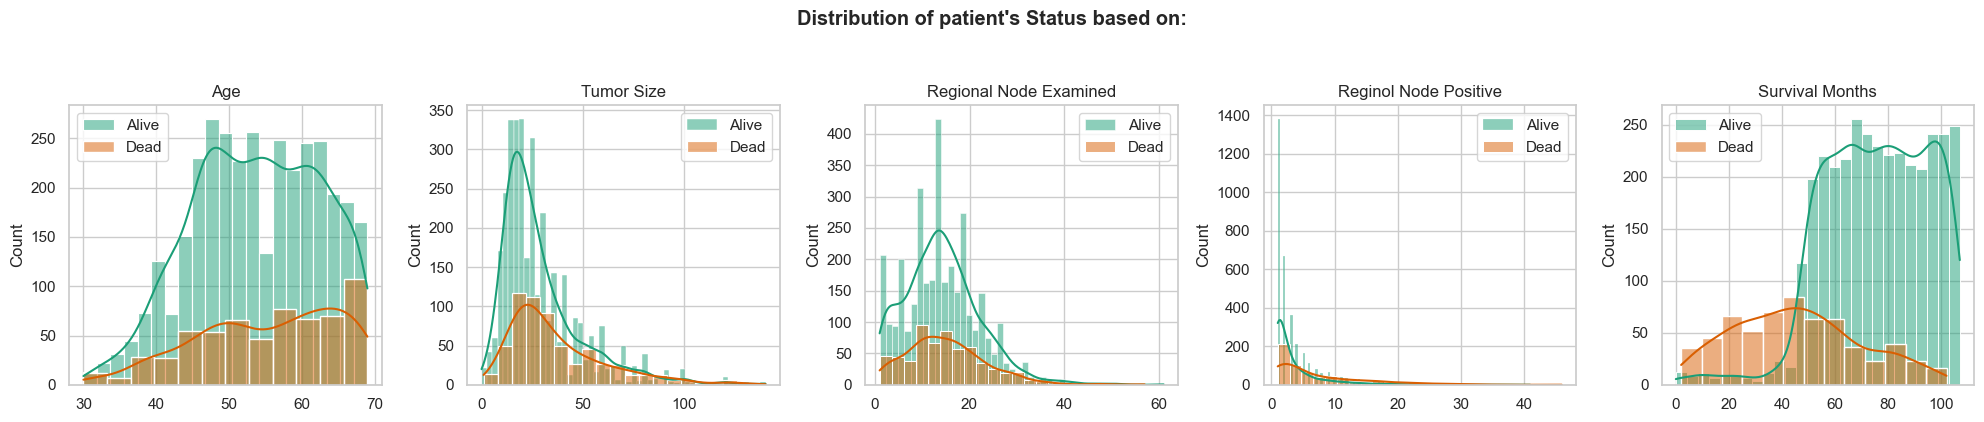

In [142]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 5, figsize=(20, 4))

# Create a color palette for better differentiation
palette = sns.color_palette("Dark2")

fig.suptitle("Distribution of patient's Status based on:", fontweight='bold', y=1.05)

for i, column_name in enumerate(grouped.columns):
    sns.histplot(alive[column_name], kde=True, color=palette[0], label='Alive', ax=ax[i])
    sns.histplot(dead[column_name], kde=True, color=palette[1], label='Dead', ax=ax[i])
    
    ax[i].set_title(column_name)
    ax[i].set_xlabel('')
    ax[i].legend()

# Adjust the layout for better spacing
plt.tight_layout()
plt.show()


In [144]:
object_data_status

,Race,Marital Status,T Stage,N Stage,6th Stage,differentiate,Grade,A Stage,Estrogen Status,Progesterone Status,Status
count,4024,4024,4019,4024,4024,4018,4024,4024,4024,4024,4024
unique,3,5,4,3,5,4,4,2,2,3,2
top,White,Married,T2,N1,IIA,Moderately differentiated,2,Regional,Positive,Positive,Alive
freq,3413,2643,1785,2732,1305,2349,2351,3932,3755,3322,3408


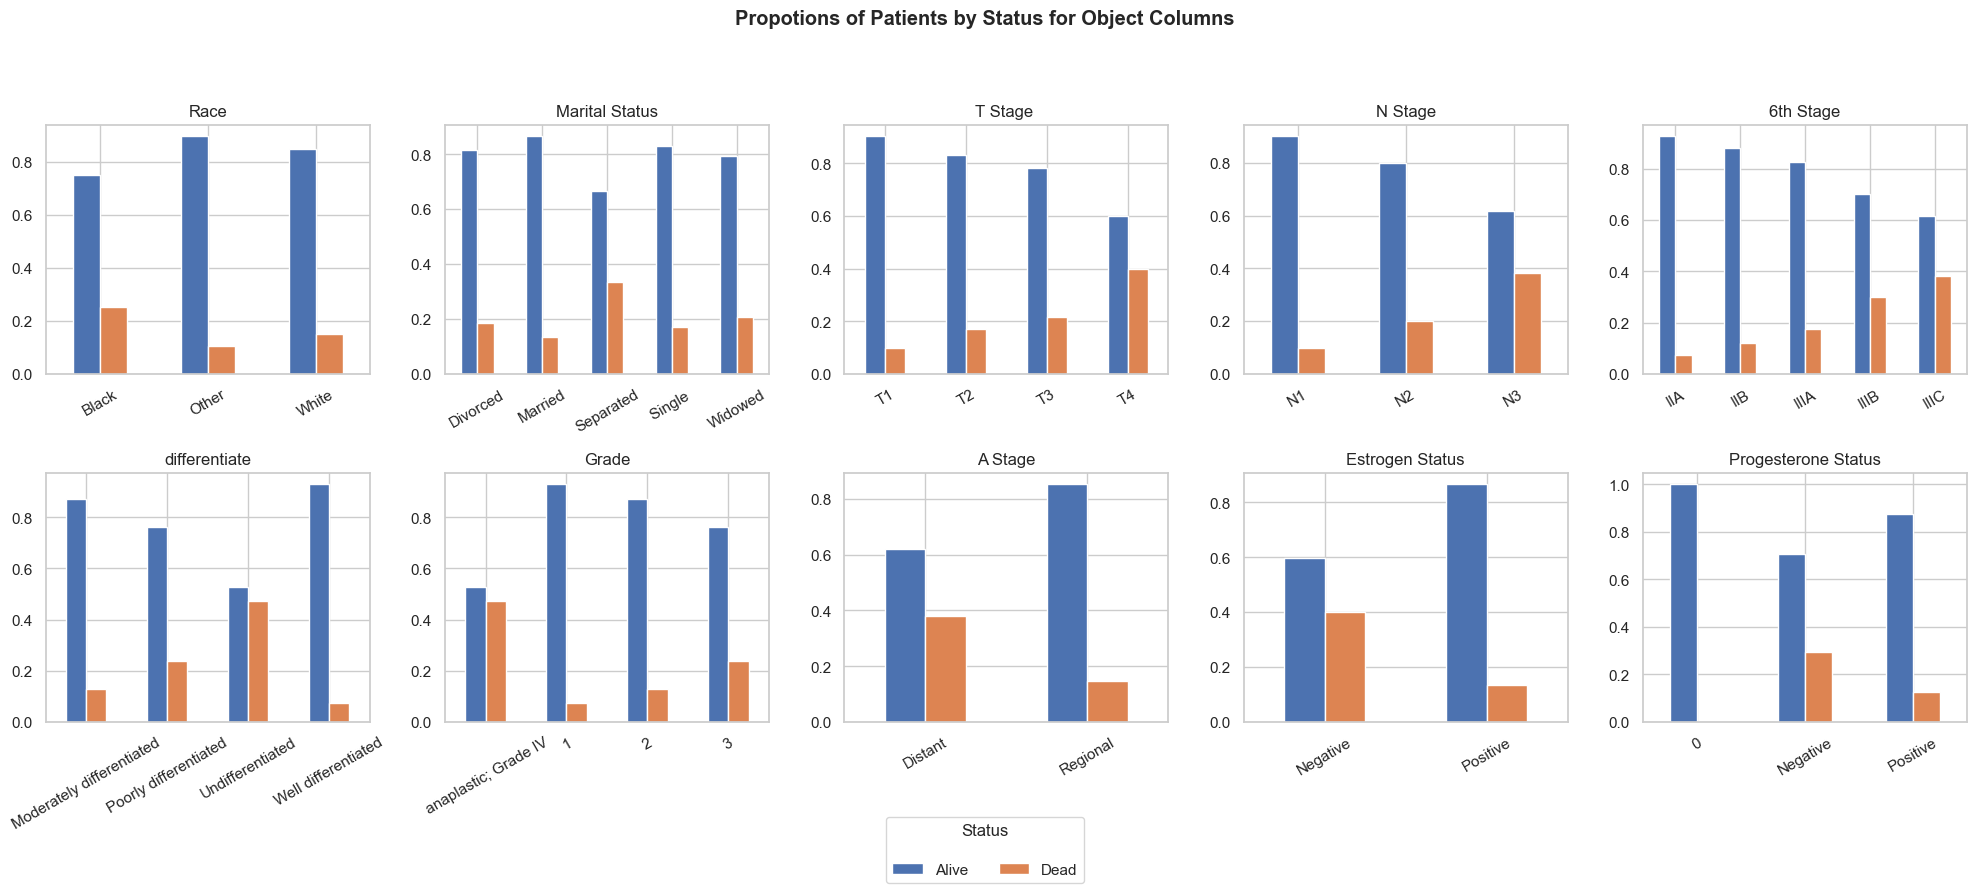

In [277]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set a Seaborn style for better aesthetics
# sns.set(style='whitegrid')

# Assuming 'alive' and 'dead' are your DataFrames
fig, ax = plt.subplots(2, 5, figsize=(20, 8))  # Adjusted for 10 object columns
fig.suptitle('Propotions of Patients by Status for Object Columns', fontweight='bold', y=1.05)

object_columns = df.drop(columns='Status').select_dtypes(include='object')

for i, column_name in enumerate(object_columns):
    row_index = i // 5
    col_index = i % 5
    
    # Calculating the propotions not the counts to be fair.
    total_values_for_each_category = df.groupby(column_name)['Status'].count()
    propotions = (df.groupby([column_name, 'Status'])['Status'].count() / total_values_for_each_category).unstack()    

    propotions.plot(kind='bar', ax=ax[row_index, col_index], legend=False)
    ax[row_index, col_index].set_title(column_name)
    ax[row_index, col_index].set_xlabel('')
    plt.setp(ax[row_index, col_index].xaxis.get_majorticklabels(), rotation=30)

fig.legend(['Alive', 'Dead'], loc='upper center', title='Status\n', bbox_to_anchor=(0.5, 0.05), ncol=2)
plt.tight_layout()
plt.show()


**Analysis of Patient Categories Most Likely to Die from Breast Cancer:**

**Race:** The analysis reveals that individuals belonging to the `Black` race exhibit a higher likelihood of mortality from breast cancer.

**Marital Status:** Among various marital statuses, those who are `Separated` appear to have a higher likelihood of succumbing to breast cancer.

###  Q3:

###  Q4:
Solution:



###  Q5:

###  Q6:

###  Q7:

###  Q8 :
Solution


# Assignment 2 - Machine Learning Models for Prediction
**(15 points total)**

 
* In **Assignment 1**, we have explored the data, cleaned up the data, modified features, and created new ones. 
* In **Assignment 2**, we will apply supervised machine learning models for classification and regression, evaluate its perofrmance, and identify the best models to solve the following problems: 

    * The **classification problem** is: given a train dataset of patients who survived or did not survive, build a model which can determine based on a given test dataset not containing the death event information information, if these patients in the test dataset survived or not. 

    * The **regression problem** is: predict the number of months that remains for the survival of the patient.



**Question 1. (Data preparation)**  _(2 points)_
* List the relevant features which you will use for classification and explain your answer (*a relevant feature is a feature that can have an impact on the chance of survival of the patient*).
* List the relevant features which you will use for regression and explain your answer (*a relevant feature is a feature that can have an impact on the prediction of the number of remaining survival months of the patient*).
* Divide both your datasets into a training set (70%) and a testing set (30%). All models will be trained and tested on the same splits.
    





###  Data Preparation & Spliting for the Classification Model

###  Data Preparation & Spliting for the Regression Model

**Question 2. (Classification models)**  _(3 points)_
* Train three different classification models of your choice using the training set. Explain the rationale behind selecting each of these three algorithms. You may refer to the following guidlines for model selection: 
    * Diagram from scikit-learn: https://scikit-learn.org/stable/tutorial/machine_learning_map/
    * Models comparison table: https://docs.google.com/spreadsheets/d/16i47Wmjpj8k-mFRk-NnXXU5tmSQz8h37YxluDV8Zy9U/edit#gid=0



**Question 3. (Evaluation of classification models)**  _(3 points)_
* Evaluate the performance of your three classification models on the testing set using the following metrics: accuracy, area under the curve (AUC), precision, and recall.
* Based on the models evaluation results, what is the best model and why?




**Question 4. (Regression models)**  _(3 points)_
* Train two different regression models of your choice using the training set. Explain the rationale behind selecting each of these two algorithms. 



**Question 5. (Evaluation of regression models)**  _(3 points)_
* Evaluate the performance of your two regression models on the testing set using the following metrics: mean absolute error,mean squared error, and R-square.
* Based on the models evaluation results, what is the best model and why?



**Question 6. (Possible improvements)** _(1 points)_
* How can you improve the accuracy of your classification model?
* How can you improve the accuracy of your regression model?